## Sigmoid Function
### The sigmoid function also known as the logistic function is going to be the key to using logistic regression to perform classification.

In [1]:
import numpy as np
x = np.random.uniform(-100,100,100)
y = 1/(1+np.exp(-x))
print(x,y)

[ 71.10787191 -96.94042682  38.82085841 -79.17402595   6.96603491
 -39.62752    -74.12265494  36.47552566  84.67883316  -4.73759903
 -31.1656853  -85.29050599  57.81105109 -28.76005941 -79.12068496
 -35.76954838 -29.32165022 -77.37905389 -78.05153778 -65.17211693
  28.34762731 -64.76280412 -35.63539612  89.95199419 -16.4953618
  -4.80255162  22.57596352   7.0042705  -63.06689585  94.5692974
  78.29915326   1.42130981  76.59370431 -16.70235086  57.03742624
  72.40650943 -23.81293037  31.13672105  86.66509111  83.15027397
  31.04077654  54.12260907  44.13074072 -54.20627834   0.69959602
  91.70473855  97.0494049   83.02145244  55.49717257  38.17810272
 -81.89915847 -93.89141715 -55.0878327  -23.06789991 -62.62329612
 -65.17393166 -41.40883211 -60.08088789 -37.6944323    3.77524614
 -70.84945479 -82.74875865 -91.7966393   87.62955169 -40.49073899
  30.94929239  49.19736278  32.96123618 -21.40745246 -62.32893025
 -23.34790548 -68.42546323 -32.81342713  91.35925469 -90.64160487
  68.5924171

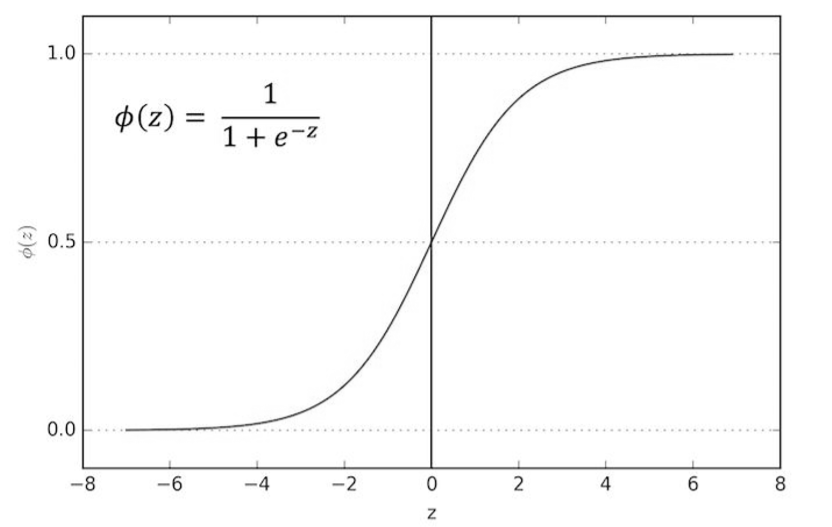

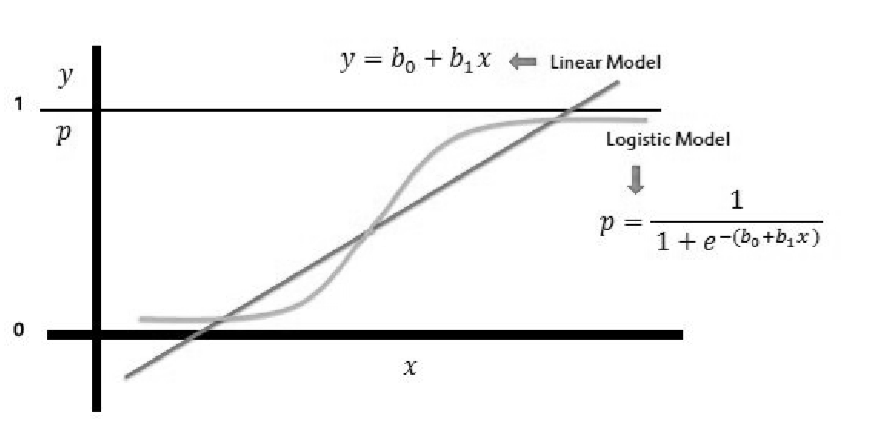

## Model evaluation

### Confusion matrix:It is cross tab of actual/target against predicted values

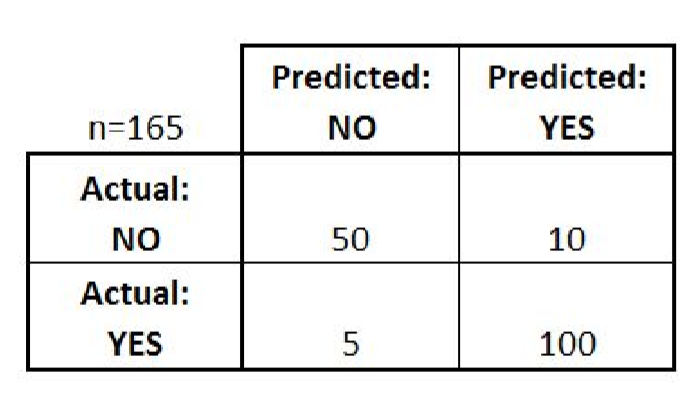

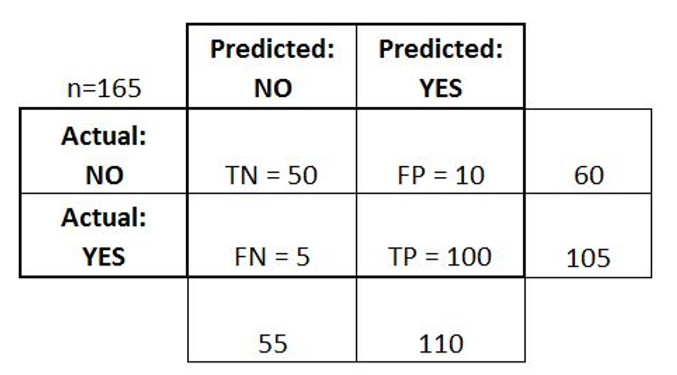

## Accuracy:

### Accuracy = (TP+TN)/Total
### Accuracy = (100+50)/165 = 0.91

## Misclassification Rate:

### MR = (FP+FN)/total
### MR = (10+5)/165 = 0.09

### Also called Error Rate

## Type of Errors
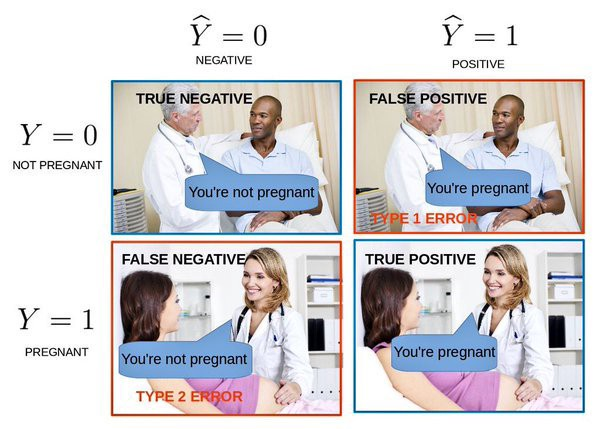

## Types of Logistic Regression
### Logistic Regression is basically of 3types -
### 1. Binary Logistic Regression
#### The categorical response has only two 2 possible outcomes.
### 2. Multinomial Logistic Regression
#### Three or more categories without ordering.
### 3. Ordinal Logistic Regression
#### Three or more categories with ordering.

# Let's work on Titanic Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('titanic_train.csv')
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Here’s the Data Dictionary, so we can understand the columns info . better:
#### PassengerID-type should be integers
#### Survived-survived or not
#### Pclass-class of Travel of every passenger
#### Name- the name of the passenger
#### Sex -gender
#### Age-age of passengers
#### SibSp -No. of siblings/spouse aboard
#### Parch-No. of parent/child aboard
#### Ticket-Ticket number
#### Fare -what Prices they paid
#### Cabin -cabin number
#### Embarked-the port in which a passenger has embarked.
#### C -Cherbourg , S -Southhampton , Q -Queenstown

In [4]:
train.shape

(891, 12)

In [5]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25

In [6]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Exploratory Data Analysis

### Missing Data
#### We can use seaborn to create a simple heatmap to see where we are missing data!

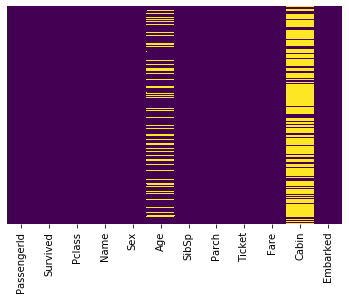

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Data Visualizations

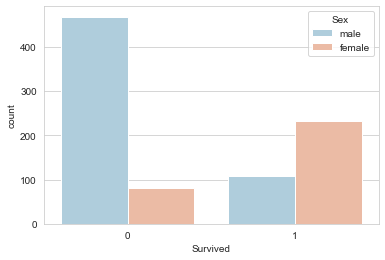

In [9]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, 
              palette='RdBu_r')

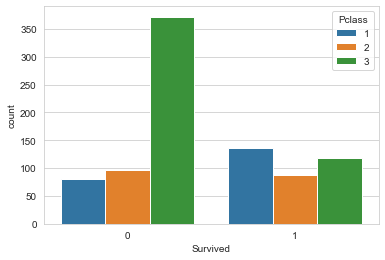

In [10]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

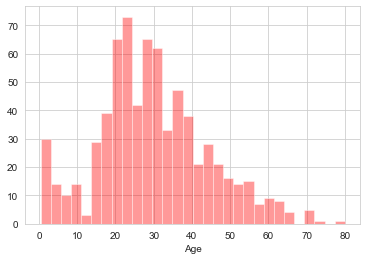

In [11]:
#distribution plot of age of the people
sns.distplot(train['Age'].dropna(), kde=False, bins=30, 
             color = "Red")

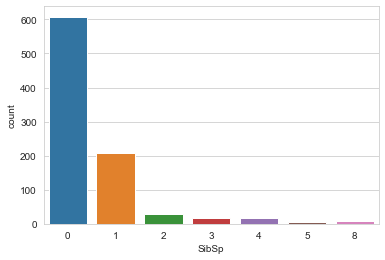

In [12]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=train)

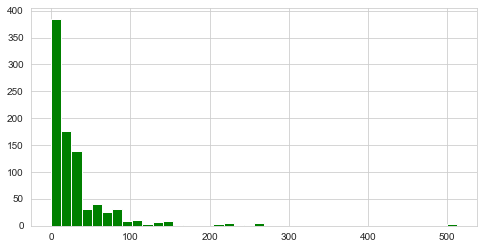

In [13]:
#distribution plot of the ticket fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Data Cleaning

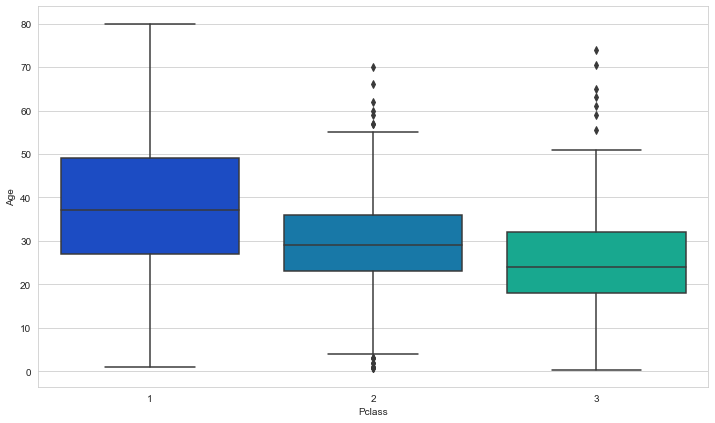

In [14]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [15]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
                    return 38
        elif Pclass == 2:
                    return 30
        else:
                    return 25
    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

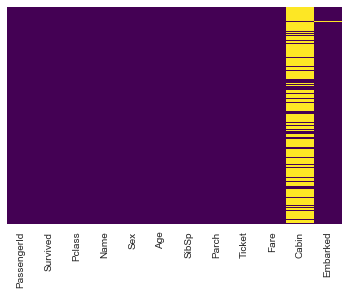

In [18]:
## Check heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,
            cmap='viridis')

In [19]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [20]:
train.drop('Cabin',axis=1,inplace=True)
#train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Converting Categorical Features

In [21]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex,embark],axis=1)
#check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building a Logistic Regression model

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
           train['Survived'], test_size=0.30, 
            random_state=101, stratify = train['Survived'])

In [29]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression(solver='saga',n_jobs=-1,
                              max_iter=10000,verbose=1,
                             penalty='elasticnet',l1_ratio=0.5)
logmodel.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 7240 epochs took 3 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=10000,
                   multi_class='warn', n_jobs=-1, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [30]:
#predictions
predictions = logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82       165
           1       0.86      0.36      0.51       103

    accuracy                           0.73       268
   macro avg       0.78      0.66      0.66       268
weighted avg       0.77      0.73      0.70       268



In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[159   6]
 [ 66  37]]


In [33]:
from sklearn.metrics import roc_auc_score